# Placement Prediction Dataset

Descripcion del dataset...

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

En primer lugar vamos a cargar los archivos, este codigo permitira que descarguemos nuestro dataset desde la pagina de kaggle en donde se encuentra alojado

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"danielyaruro20","key":"dc76e7daccb96fc9665e64a7595fb95d"}'}

In [2]:
import os
import zipfile

# Mover kaggle.json a la ubicación correcta
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Asegurar permisos correctos

In [3]:
!kaggle datasets download -d ruchikakumbhar/placement-prediction-dataset
with zipfile.ZipFile("placement-prediction-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("placement_data")

Dataset URL: https://www.kaggle.com/datasets/ruchikakumbhar/placement-prediction-dataset
License(s): CC0-1.0
  0% 0.00/99.7k [00:00<?, ?B/s]
100% 99.7k/99.7k [00:00<00:00, 59.8MB/s]


## Carga y exploracion del dataset

De aqui podemos ver como son los tipos de datos que tendremos en nuestro dataset, tenemos desde booleanos, enteros, y algunos valores continuos

Vamos a ajustar el indice de nuestro dataset, de modo que el StudentID sea nuestro indice

In [75]:
import pandas as pd

df = pd.read_csv("/content/placement_data/placementdata.csv", index_col="StudentID")
df.head()

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
StudentID,,,,,,,,,,,
1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


De aqui podremos ver alguna informacion de nuestro dataset como son las columnas y ver que tantos valores nulos tiene, para este caso tendremos 10000 datos y todos los datos estan completos por lo que no tenemos valores nulos

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CGPA                       10000 non-null  float64
 1   Internships                10000 non-null  int64  
 2   Projects                   10000 non-null  int64  
 3   Workshops/Certifications   10000 non-null  int64  
 4   AptitudeTestScore          10000 non-null  int64  
 5   SoftSkillsRating           10000 non-null  float64
 6   ExtracurricularActivities  10000 non-null  object 
 7   PlacementTraining          10000 non-null  object 
 8   SSC_Marks                  10000 non-null  int64  
 9   HSC_Marks                  10000 non-null  int64  
 10  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(6), object(3)
memory usage: 937.5+ KB


Podemos ver aqui algunas estadisticas de nuestro dataset para las variables numericas, para poder ubicar los datos que tenenmos y tener una idea clara de los valores posibles que pueden haber en cada columna

In [7]:
df.describe()

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,7.698010,1.049200,2.026600,1.013200,79.449900,4.323960,69.159400,74.501500
std,0.640131,0.665901,0.867968,0.904272,8.159997,0.411622,10.430459,8.919527
min,6.500000,0.000000,0.000000,0.000000,60.000000,3.000000,55.000000,57.000000
25%,7.400000,1.000000,1.000000,0.000000,73.000000,4.000000,59.000000,67.000000
50%,7.700000,1.000000,2.000000,1.000000,80.000000,4.400000,70.000000,73.000000
75%,8.200000,1.000000,3.000000,2.000000,87.000000,4.700000,78.000000,83.000000
max,9.100000,2.000000,3.000000,3.000000,90.000000,4.800000,90.000000,88.000000


Aqui podremos ver un poco de la descripcion de lo que son los valores que estan como cadenas o que no son numericos para poder observar como estan distribuidos esos datos en nuestro dataset

In [8]:
df.describe(include="object")

,ExtracurricularActivities,PlacementTraining,PlacementStatus
count,10000,10000,10000
unique,2,2,2
top,Yes,Yes,NotPlaced
freq,5854,7318,5803


Como podemos observar los valores que tenemos como cadenas de datos no son mas que valores booleanos pero en formato String, por ende lo que haremos sera esos datos parsearlos a formato boolean para un mejor manejo de estos datos a futuro

Usaremos 1 para los valores "Yes"

Usaremos 0 para los valores "No"

In [10]:
df_original = df.copy()

In [76]:
df["ExtracurricularActivities"] = df["ExtracurricularActivities"].apply(lambda x: 1 if x == "Yes" else 0)
df["PlacementTraining"] = df["PlacementTraining"].apply(lambda x: 1 if x == "Yes" else 0)
df["PlacementStatus"] = df["PlacementStatus"].apply(lambda x: 1 if x == "Placed" else 0)

Vemos ahora si las estadisticas de todas las 11 columnas de nuestro dataset

In [13]:
df.describe()

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus,ExtracurricularActivities
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,7.698010,1.049200,2.026600,1.013200,79.449900,4.323960,0.731800,69.159400,74.501500,0.419700,0.585400
std,0.640131,0.665901,0.867968,0.904272,8.159997,0.411622,0.443044,10.430459,8.919527,0.493534,0.492677
min,6.500000,0.000000,0.000000,0.000000,60.000000,3.000000,0.000000,55.000000,57.000000,0.000000,0.000000
25%,7.400000,1.000000,1.000000,0.000000,73.000000,4.000000,0.000000,59.000000,67.000000,0.000000,0.000000
50%,7.700000,1.000000,2.000000,1.000000,80.000000,4.400000,1.000000,70.000000,73.000000,0.000000,1.000000
75%,8.200000,1.000000,3.000000,2.000000,87.000000,4.700000,1.000000,78.000000,83.000000,1.000000,1.000000
max,9.100000,2.000000,3.000000,3.000000,90.000000,4.800000,1.000000,90.000000,88.000000,1.000000,1.000000


## Exploracion grafica del dataset

En primer lugar veremos como estan relacionadas nuestras variables y ver que concluciones podemos sacar de correlaciones en nuestro dataset, para ello nos ayudaremos de un pairplot() y tambien de una matriz de correlacion

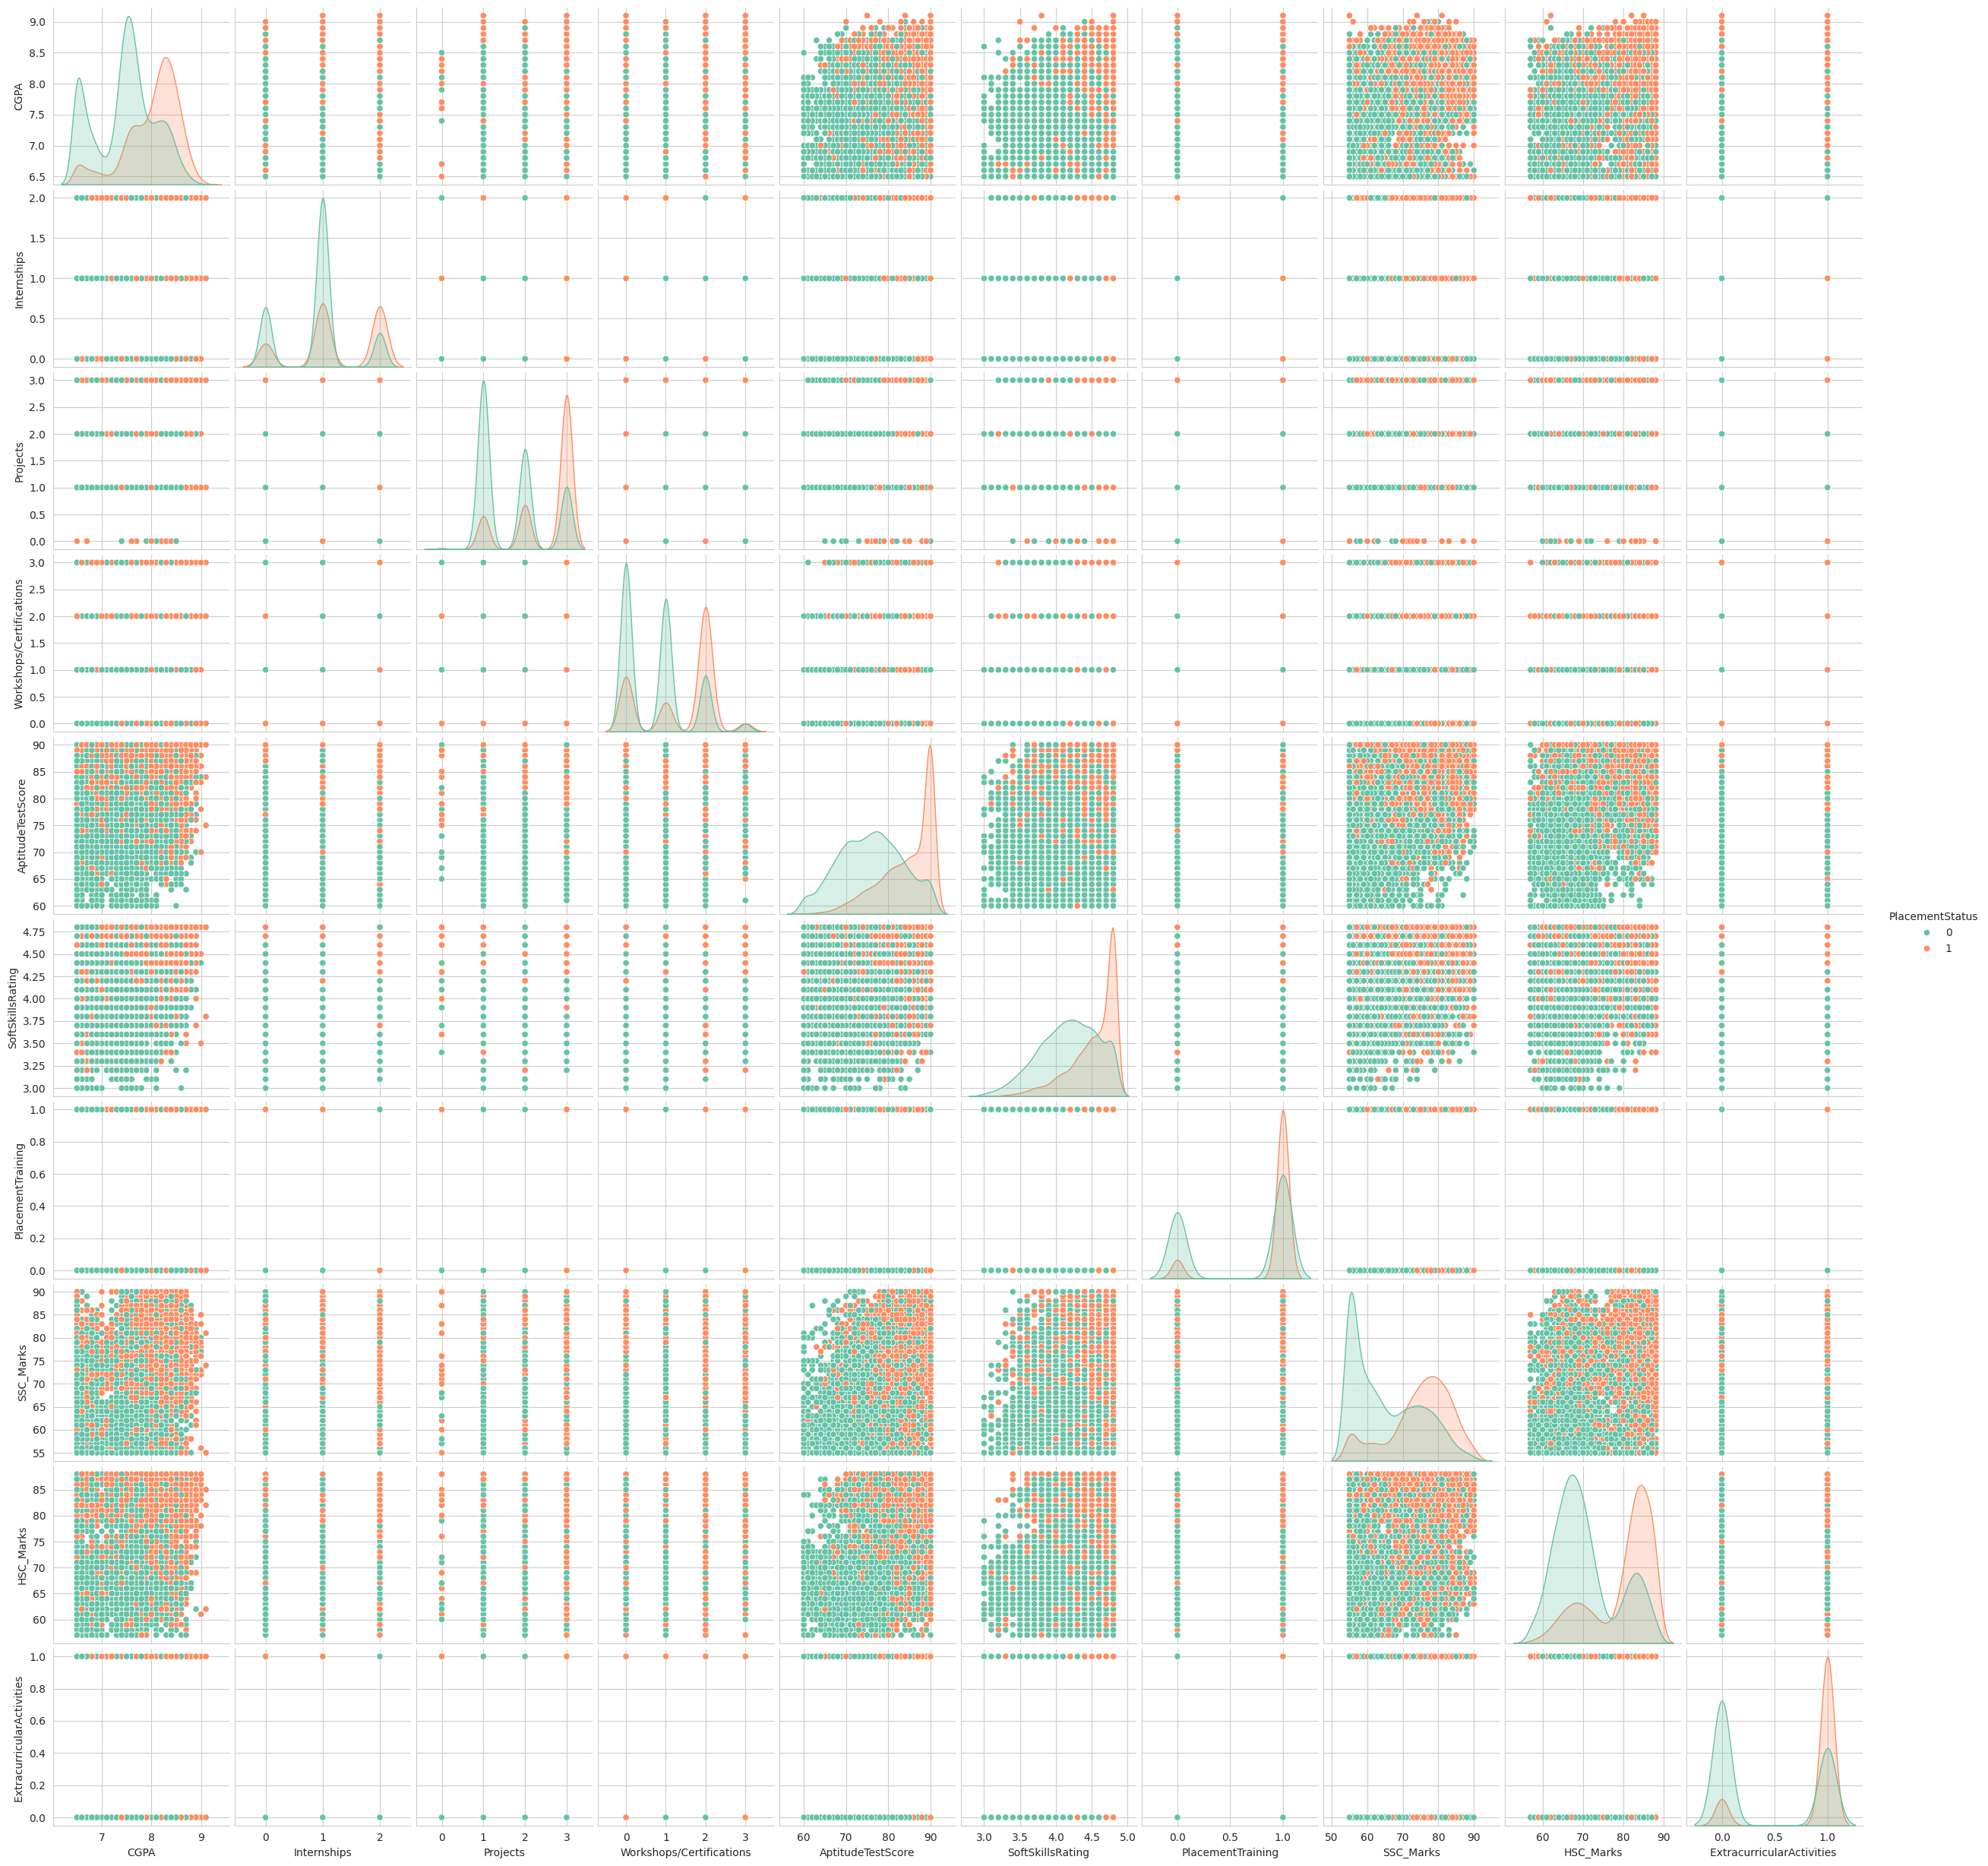

In [17]:
#Pairplot entre todos nuestros datos para ver las respectivas correlaciones
sns.pairplot(df, hue="PlacementStatus", palette="Set2", diag_kind="kde")

A simpe vista de la grafica podemos ver que no se observa facilmente alguna correlacion entre las variables que tenemos, algo a destacar es que el color verde y naranja en las graficas corresponde a los valores booleanos sobre si un estudiante fue ubicado en un trabajo o no, sin embargo comprobemos la no existencia de correlacion entre las variables con una matriz de correlaciones

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CGPA                        10000 non-null  float64
 1   Internships                 10000 non-null  int64  
 2   Projects                    10000 non-null  int64  
 3   Workshops/Certifications    10000 non-null  int64  
 4   AptitudeTestScore           10000 non-null  int64  
 5   SoftSkillsRating            10000 non-null  float64
 6   ExtracurricularActivities   10000 non-null  object 
 7   PlacementTraining           10000 non-null  int64  
 8   SSC_Marks                   10000 non-null  int64  
 9   HSC_Marks                   10000 non-null  int64  
 10  PlacementStatus             10000 non-null  int64  
 11  ExtracurricularActivities   10000 non-null  int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 1015.6+ KB


<Axes: >

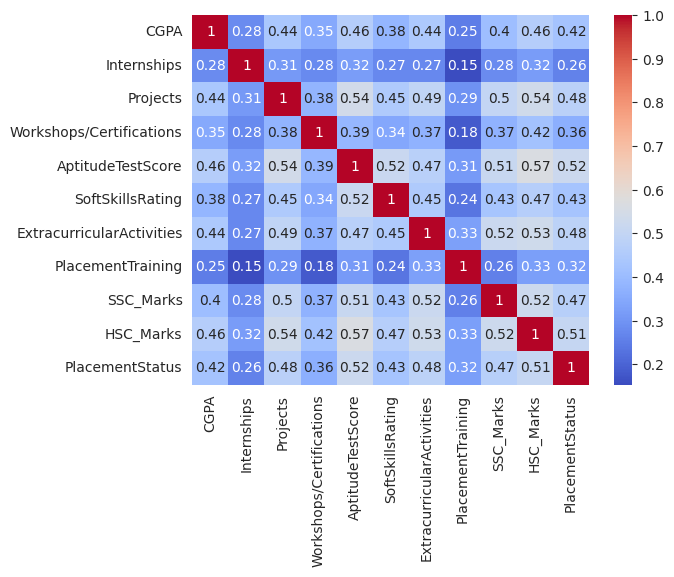

In [32]:
corr_mat = df.corr()
sns.heatmap(corr_mat, annot=True, cmap="coolwarm") #Mapa de calor de las correlaciones entre los datos

Esta claro con nuestra grafica de calor de las correlaciones que no existe una fuerte correlacion entre alguna de nuestras variables

Vamos a explorar el conjunto de datos que tenemos, para poder ver la distribucion de los datos de todas las columnas

- **Columna CGPA**

Como vimos en el metodo describe es una columna que contiene valores continuos al parecer que van de 0 a 10, correspondientes al CGPA de cada estudiante del dataset, por ende el grafico que podria darnos mayor detalle es un histplot

<Axes: xlabel='CGPA', ylabel='Count'>

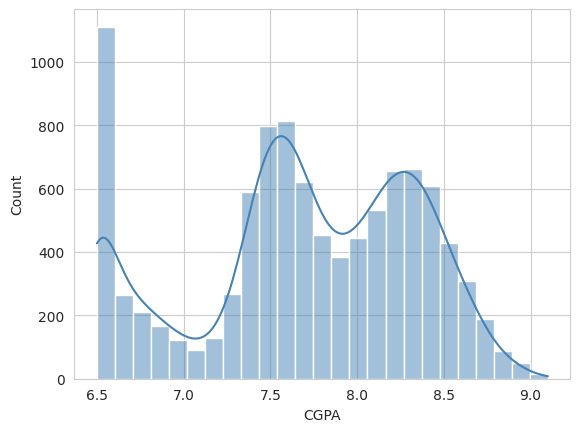

In [39]:
sns.set_style("whitegrid")
sns.histplot(df, x="CGPA", bins=25, kde=True, color="steelblue")

En esta grafica podemos observar que los CGPA que tienen la mayoria de los estudiantes es de 6.5, tambien estan aproximademente entre 8.3-8.5, y tambien entre 7.3 y 7.7, no sigue una distribucion muy clara

- **Columna Internships**

Estos datos representan la cantidad de interships que han hecho los estudiantes, ahora el maximo valor que encontramos son hasta 2 interships de varios estudiantes, y el minimo valor es 0, es decir tendremos solo 3 categorias para este tipo de dato

<Axes: xlabel='Internships', ylabel='count'>

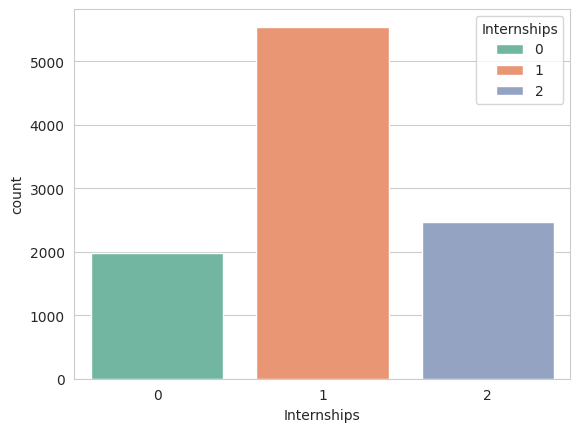

In [43]:
sns.countplot(x="Internships", data=df, palette="Set2", hue="Internships")

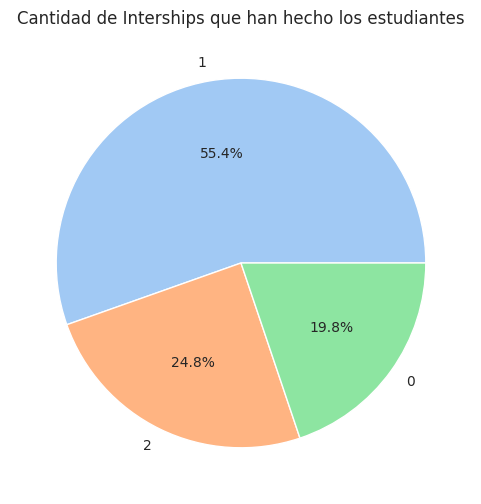

In [57]:
plt.figure(figsize=(6, 6))
sns.set_style("whitegrid")
sns.set_palette("pastel")
plt.pie(df["Internships"].value_counts(), labels=df["Internships"].value_counts().index, autopct="%1.1f%%")
plt.title("Cantidad de Interships que han hecho los estudiantes")
plt.show()

El insight que logramos capturar de la grafica es que la mayoria de los estudiantes se postulan a un primer trabajo con al menos 1 internship realizado

- **Columna Projects**

Esta columna representa la cantidad de proyectos que han hecho los estudiantes antes de explorar su primer trabajo, como vemos se podria considerar una variable categorica por ende las graficas que mejor quedan serian countplot o un pieplot

In [60]:
df["Projects"].value_counts()

,count
Projects,
3,3873
1,3547
2,2550
0,30


<Axes: xlabel='Projects', ylabel='count'>

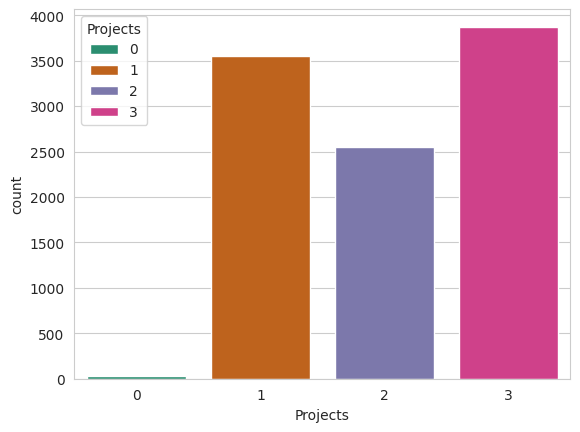

In [67]:
sns.countplot(x="Projects", data=df, palette="Dark2", hue="Projects")

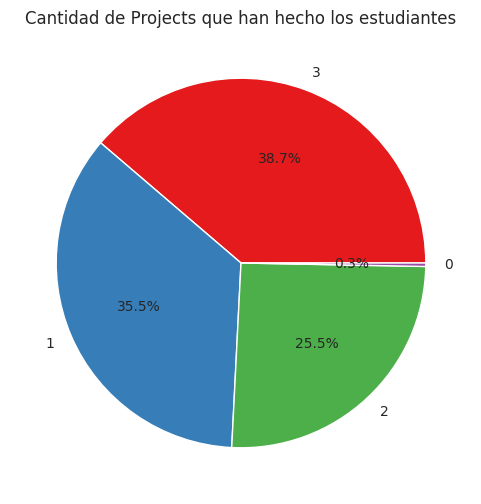

In [69]:
plt.figure(figsize=(6, 6))
sns.set_style("whitegrid")
sns.set_palette("Set1")
plt.pie(df["Projects"].value_counts(), labels=df["Projects"].value_counts().index, autopct="%1.1f%%")
plt.title("Cantidad de Projects que han hecho los estudiantes")
plt.show()

Observando las graficos podemos notar que la mayoria de estudiantes cuenta con 3 proyectos o unos 2 proyectos a la hora de lanzarse a su primer trabajo

- **Columna Workshops/Certifications**

Esta columna corresponde a el numero de workshops/certificaciones de los estudiantes que se postularon para una colocacion

In [94]:
df["Workshops/Certifications"].value_counts()

,count
Workshops/Certifications,
0,3739
2,3303
1,2674
3,284


Vamos a usar un grafico de barras apiladas teniendo en cuenta nuestra variable objetivo en este caso placement status donde cada color representara si ese estudiante fue asignado o no

In [82]:
piv_table = df.groupby(["Workshops/Certifications", "PlacementStatus"]).size().unstack()

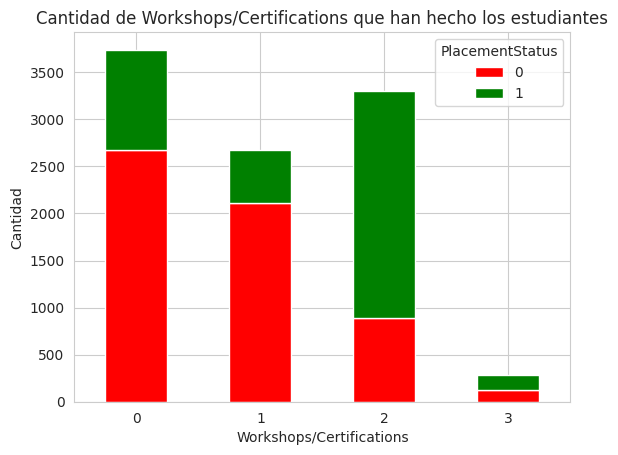

In [91]:
piv_table.plot(kind="bar", stacked=True, color=["red", "green"]);
plt.title("Cantidad de Workshops/Certifications que han hecho los estudiantes");
plt.xlabel("Workshops/Certifications");
plt.ylabel("Cantidad");
plt.xticks(rotation=0);

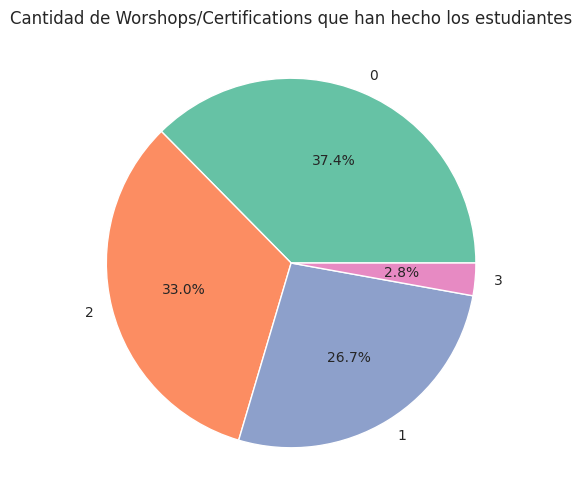

In [96]:
plt.figure(figsize=(6, 6))
sns.set_style("whitegrid")
sns.set_palette("Set2")
plt.pie(df["Workshops/Certifications"].value_counts(), labels=df["Workshops/Certifications"].value_counts().index, autopct="%1.1f%%")
plt.title("Cantidad de Worshops/Certifications que han hecho los estudiantes")
plt.show()

Parece haber una ligera correlacion positiva entre la cantidad de workshops/certificaciones y la posibilidad de conseguir un trabajo. Los estudiantes con mas certificaciones tienen mas probabilidades de ser colocados en comparacion con los que no tienen ninguna. Es mas probable si tienen al menos dos workshops/certifications

- **Columna AptitudeTestScore**

Esta columna representa la calificacion que obtuvieron los estudiantes en el test de actitud que hace la empresa o organizacion para asignar a los estudiantes

Como pudimos ver esta columna tiene valores de calificacion del uno al 100, un histplot nos ayudara a ver como fue el resultado de los estudiantes en general

<Axes: xlabel='AptitudeTestScore', ylabel='Count'>

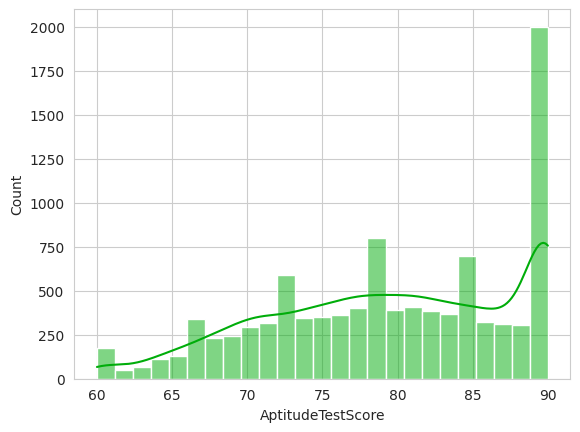

In [115]:
sns.histplot(df, x="AptitudeTestScore", bins=25, kde=True, color="#00ad0a")

Los datos revelan que a la mayoria de los estudiantes les fue bastante bien en el test de aptitud mostrando la mayoria de calificaciones entre 90 y 100 aproximadamente

Veamos que tanto influye estos datos con la variable objetivo usando graficos como boxplot o violinplot

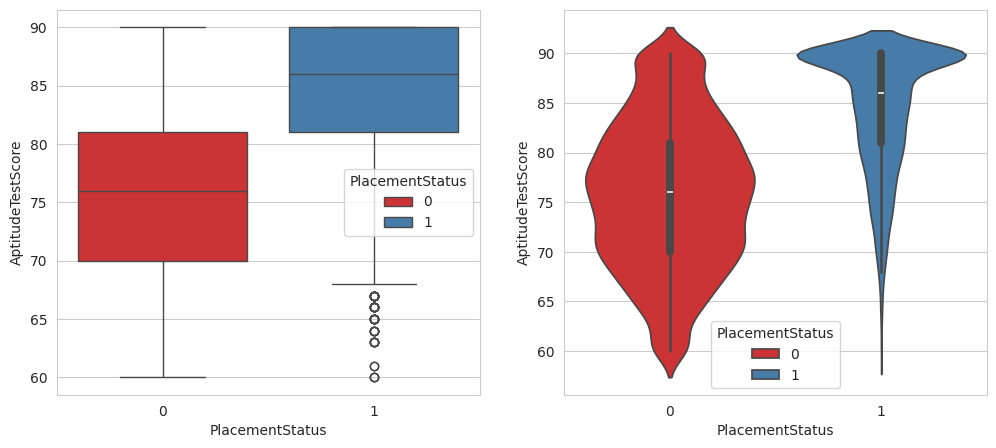

In [114]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(x="PlacementStatus", y="AptitudeTestScore", data=df, ax=axes[0], hue="PlacementStatus", palette="Set1")
sns.violinplot(x="PlacementStatus", y="AptitudeTestScore", data=df, ax=axes[1], hue="PlacementStatus", palette="Set1")
plt.show()

Observando este par de graficas podemos resaltar que precisamente la mayoria de estudiantes que logran ser colocados obtienen un test de aptitud con una buena calificacion normalmente mayor que 80, sin embargo viendo los outliers podemos notar que no todos los que tienen una baja calificacion no logran ser colocados